## Importation and Definition

In [1]:
from numpy import pi
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

def spin_average(state):
    possib=qt.Qobj.diag(state)
    result=possib[0]-possib[-1]
    return result

def K_calc_1over2(t1,t2):
    initial_state=np.array([1,0])
    initial_state=qt.Qobj(initial_state)
    ham=qt.spin_Jx(1/2)
    initial_rho=initial_state*qt.dag(initial_state)

    second=qt.mesolve(ham,initial_rho,[0,t1])

    third_start=qt.Qobj.diag(second.states[-1])
    third_start=qt.Qobj(np.array([[third_start[0],0],[0,third_start[1]]]))
    
    #third_start=second.states[-1]
    
    third=qt.mesolve(ham,third_start,[0,t2])

    q12=spin_average(second.states[-1])
    
    
    third_unperturbed_start=second.states[-1]
    third_unperturbed=qt.mesolve(ham,third_unperturbed_start,[0,t2])
    q13=spin_average(third_unperturbed.states[-1])
    q23=spin_average(second.states[-1])*spin_average(third.states[-1])
    
    K=q12+q23-q13
    return K


def spin_average_cat(state):
    piover2=qt.spin_Jx(5/2)+qt.spin_Jx(5/2)**2
    population_state=qt.mesolve(piover2,state,[0,pi/2])
    possib=qt.Qobj.diag(population_state.states[-1])
    spin_result=possib[0]-possib[-1]
    after_detection=qt.Qobj(np.diag(possib))
    final=qt.mesolve(piover2,after_detection,[0,3*pi/2])
    final=final.states[-1]
    return spin_result,final
    
def K_calc_5over2(t1,t2):
    initial_state=np.array([1,0,0,0,0,0])
    initial_state=qt.Qobj(initial_state)
    precession_ham=qt.spin_Jz(5/2)
    initial_rho=initial_state*qt.dag(initial_state)
    piover2=qt.spin_Jx(5/2)+qt.spin_Jx(5/2)**2
    
    cat1=qt.mesolve(piover2,initial_rho,[0,pi/2])
    
    cat2=qt.mesolve(precession_ham,cat1.states[-1],[0,t1])
    
    spin2=spin_average_cat(cat2.states[-1])[0]
    
    cat2_aftermeasurement=spin_average_cat(cat2.states[-1])[1]
    
    #third_start=second.states[-1]
    
    cat3=qt.mesolve(precession_ham,cat2_aftermeasurement,[0,t2])

    spin3=spin_average_cat(cat3.states[-1])[0]
    q12=spin2
    
    
    third_unperturbed_start=cat2.states[-1]
    third_unperturbed=qt.mesolve(precession_ham,third_unperturbed_start,[0,t2])
    q13=spin_average_cat(third_unperturbed.states[-1])[0]
    q23=spin2*spin3
    
    K=q12+q23-q13
    return K

1.4379574496113618


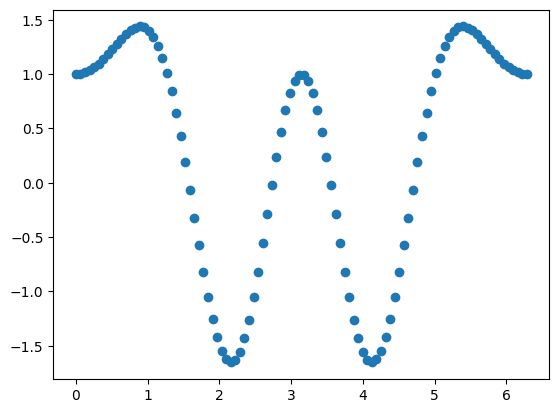

In [2]:
theta_list=np.linspace(0,2*pi,100)
K=[0 for j in theta_list];
K_max=[0 for j in theta_list];
K_min=[0 for j in theta_list];
for i in range(0,len(theta_list)):
    t1=theta_list[i]
    K[i]=K_calc_1over2(t1,2*t1)
    
plt.figure()
plt.scatter(theta_list,K)


print(np.amax(K))

(1.4379580348541752+0j)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


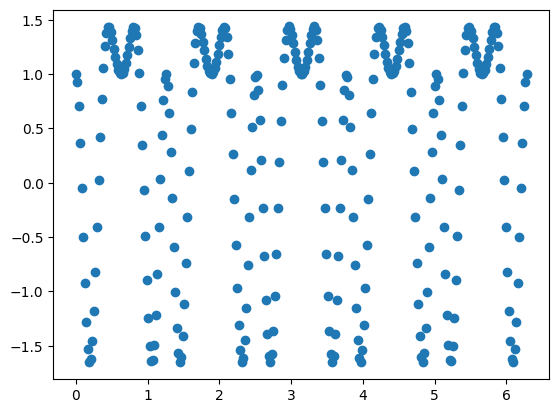

In [3]:
theta_list=np.linspace(0,2*pi,300)
K=[0 for j in theta_list];
K_max=[0 for j in theta_list];
K_min=[0 for j in theta_list];
for i in range(0,len(theta_list)):
    t1=theta_list[i]
    K[i]=K_calc_5over2(t1,2*t1)
    
plt.figure()
plt.scatter(theta_list,K)


print(np.amax(K))